In [5]:
# Si des questions: email: carla.joud@univ-renne.fr

#bibliothèques utilisées: 
import numpy as np  # permet d'effectuer des calculs numériques
import matplotlib.pyplot as plt #permet de produire des graphes


# **TP : Méthode de la puissance itérée et méthode de déflation**

*Note : Merci de rédiger vos réponses dans des cellules de type "Markdown" situées sous les questions. Vous avez la possibilité d'utiliser du LaTeX et du formatage pour écrire vos réponses.*

## **I- Introduction et contexte**

**1) Présenter le sujet, le contexte et l'objectif du TP**

Le TP porte sur le calcul des valeurs propres d'une matrice diagonalisable à l'aide de méthodes numériques : la méthode de la puissance itérée et la méthode de déflation. L'objectif principal est de créer des algorithmes qui permettent d'estimer les valeurs propres de grandes matrices, afin de les diagonaliser.

## **II- Méthode de la puissance itérée**

Soit $A \in \mathcal{M}_{n,n}(\mathbb{R})$ ( l'ensemble des matrices carrées de taille n à coefficients réels ), 

**2) À quoi sert cet algorithme ? Que prend-t-il-en entrée? Que renvoie-t-il?**

La méthode de la puissance itérée sert à estimer la plus grande valeur propre (en module) d'une matrice A. 

Elle prend en entrée :

    - Une matrice A
    - Un vecteur x0
    - Un nombre maximal d'itérations maxIter

Elle renvoie :

    - Une approximation de la plus grande valeur propre,
    - Le vecteur propre associé.

*Pour mieux comprendre*: l'idée derrière cette méthode est que, si on définit une suite $(x_n)$ de vecteurs de $\mathbb{R}^{n} $ par la relation $ x_{n+1}=Ax_{n} $, alors les vecteurs $x_n$ vont "se tourner" au cours des itérations dans la direction des vecteurs propres associés à la plus grande des valeurs propres. 

**3) Le fait de multiplier la suite itérativement par la matrice A pose un souci? Lequel? Et comment le régler?**

Les valeurs des vecteurs sont sucseptibles d'augmenter exponentiellement. Pour éviter ce problème, on normalise les vecteurs après chaque multiplication.

**4) Donner un pseudo-code de cette méthode en commentant et en n'oubliant pas la normalisation ( Voir le théorème donné dans le sujet du TP )**

In [6]:
Pseudocode Puissance itérée
--------------------------------------------------
Entrées: A, x0, Maxiter
--------------------------------------------------
x = A*x0 # initialisation
ListeLambdasIter=[]; # Liste pour stocker les lambdas au cours des itérations
ListeUIter=[]; # Liste pour stocker les valeurs d'approximation du vecteur propre associé à la plus grande valeur propre au cours des itérations

for k=1:Maxiter

    step 1: xk = A*x(k-1) 

    step 2: Un(k) = xk/||xk||

    step 3 : lambdan(k) = (Un(k))^T * A*Un(k)

    step 4: ListeLambdasIter=[ListeLambdasIter, lambdan(k)  ] #ajout à la liste des valeurs d'approximation du lambda max obtenues au cours des itération

    step 5: ListeUIter= [ ListeUIter, xk ];                   #ajout à la liste des valeurs d'approximation du vecteur propre associé au lambda max obtenues au cours des itérations

end
------------------------------------------------------
Sorties: ListeLambdasIter , ListeUIter
------------------------------------------------------


SyntaxError: invalid syntax (1949689490.py, line 1)

**Implémentez la fonction `PuissIter` en Python pour réaliser l'algorithme de la puissance itérée.**

**Aide** :
- Multiplication matricielle : `np.dot`
- Norme d'un vecteur : `np.linalg.norm`
- Transposée d'une matrice : `.T`

**Instructions** :
- Utilisez les fonctions numpy mentionnées pour coder l'algorithme de la puissance itérée.
- Ajoutez des commentaires explicatifs pour chaque étape de votre code.


In [63]:
def PuissIter(A, x0, Maxiter):
    '''
    Comments: 
    Entrées: A : matrce que l'on cherche à diagonaliser, x0 : vecteur quelconque, Maxiter : nombre maximum d'itération tolérés
    Sorties: lambda_max : plus grande valeur propre, uIter : Vecteur propre associé à cette valeur propre
    '''
    x = np.dot(A,x0)
    ListeLambdasIter = []
    ListeUIter = []
    for k in range(Maxiter):
        x = np.dot(A,x)                                   # Calcul du nouveau veteur x
        uIter = x/np.linalg.norm(x)                       # Calcul du vecteur propre
        L = np.dot(uIter.T ,np.dot(A,uIter))                    # Calcul de la valeur propre associée

        ListeLambdasIter.append(L)                        # Ajout dans les différentes listes
        ListeUIter.append(uIter)
    
    return ListeLambdasIter, ListeUIter

**5) Conclusion: Quel est son désavantage? avantage? les conditions du théorème pour l'appliquer sont fortes? faibles?**

Avantage : Simple à implémenter, rapide pour estimer la plus grande valeur propre.

Désavantage : Ne fournit qu'une seule valeur propre et un vecteur propre associé. Ne fonctionne bien que si la plus grande valeur propre est bien distincte des autres.

La condition sur la diagonalisation est plutot forte car elle impose que A soit diagonalisable.
De même la condition sur la dominance de la plus grande valeur propre est plutot forte car elle impose que la plus grande valeur propre soit bien distincte des autres.
A l'inverse, la condition sur le vecteur initiale est putot faible car il est assez rare d'avoir un vecteur qui soit orthogonale au vecteur propre associé à la plus grande valeur propre.

Globalement, les conditions sur la diagonalisation et la dominance de la plus grande valeur propre sont plutot fortes et il est donc difficile de garantir que la méthode de la puissance itérée  fonctionne bien.

## III- Méthode de déflation

**6) À quoi sert cette méthode? Quel est son principe? Fournir un pseudo-code de cette méthode:**

La méthode de déflation sert à estimer les autres valeurs propres d'une matrice après avoir trouvé la plus grande. Le principe consiste à construire une nouvelle matrice 
B = A - λuu^T, où λ est la valeur propre trouvée et u le vecteur propre associé.

In [ ]:
---------------------------------------
Pseudo Code
---------------------------------------

Entrées: A, x0, Maxiter
---------------------------------------

nb_vp = len(A)                  # nombre de valeurs propres à estimer
ListeLambdasIter = []           # liste de valeurs propres
ListeUIter = []                 # liste de vecteurs propres
B = A.copy()                    # initialisation de B 
for k=1 : nb_vp
    
    lambdak, uk =PuissIter(B,x0,Maxiter)
    ListeLambdasIter = [ListeLambdasIter, lambdak]
    ListeUIter = [ListeUIter, uk]
    B = B*uk*uk^T
    
end
---------------------------------------
Sorties : ListeLambdasIter, ListeUIters

**7) Donnez le code Python pour calculer toutes les valeurs propres d'une matrice en utilisant le principe de la déflation**

**Aide** :
- Pour calculer le produit $u u^T$, consultez la documentation de la fonction `np.outer`.
- Remarque : Assurez-vous que $u u^T$ ait la même dimension que la matrice $A$ pour pouvoir réaliser l'opération $A - \lambda_n u u^T$.

**Instructions** :
- Implémentez le code pour extraire toutes les valeurs propres de la matrice à l'aide de la déflation.
- Expliquez chaque étape avec des commentaires dans le code.


In [74]:
def Defl(A,x0,Maxiter):
    '''
    Comments
    '''
    n= A.shape[0] #nombre de valeurs propres à estimer
    lambda_Glob=[] #Pour stocker les valeurs propres estimées
    u_Glob=[]
    B = A.copy()
    for i in range(0,n):
        x0 = np.random.rand(n)
        x0 = x0 / np.linalg.norm(x0)
        ListeLambdasIter,ListeUIter=PuissIter(B,x0,Maxiter)
        lambdak = ListeLambdasIter[-1]
        uk = ListeUIter[-1]
        lambda_Glob.append(lambdak)
        u_Glob.append(uk)
        B= B - lambdak*np.outer(uk,uk.T) # mise à jour de B
        
    return lambda_Glob, u_Glob


## **IV- Mise en pratique sur un exemple**

**Question 1 : Utilisez `np.linalg.eig` pour calculer et afficher les valeurs propres d'une matrice $A$, et affichez les 3 premières valeurs propres de $A$**

In [15]:
A = np.array([[-261, 209, -49],
              [-530, 422, -98],
              [-800, 631, -144]])

valpropres, vectpropres = np.linalg.eig(A)

for idx, val in enumerate(valpropres):
    print("Valeur propre numéro " +  str(idx+1) + " : " + str(val))

Les valeurs propres de A sont :
Valeur propre numéro 1 : 9.99999999999191
Valeur propre numéro 2 : 3.0000000000072933
Valeur propre numéro 3 : 4.0000000000006635


**Question 2: Application de la fonction Puissance Itérée sur un exemple**

In [35]:
x0 = np.random.rand(len(A)) #initialisation du vecteur x0 de façon aléatoire selon les dimensions de A
x0= x0/np.linalg.norm(x0)## Normalisation du vecteur
Maxiter =  100
L_max,U_L  = PuissIter(A, x0, Maxiter)
## afficher la dernière approximation de la valeur propre max de A ( le dernier élement d'un vecteur peut être obtenu avec "[-1]" )
print("Plus grand valeur propre : " + str(L_max[-1]))


Plus grand valeur propre : 10.000000000000652


**Question 3 : Cette fois, faites varier la variable `MaxIter`, c'est-à-dire le nombre d'itérations choisi pour l'algorithme.**

**Instructions** :
- Représentez l'évolution de l'estimation de la plus grande valeur propre en fonction de la variable `MaxIter`.
- Utilisez `plt.plot` pour afficher un graphique.
- N'oubliez pas de légender le graphique et de lui donner un titre.


In [66]:
def vary_Maxiter_and_plot(A, x0):
    
    ##Puiss Iter
    ListeMaxIter = []
    ListeLambdasFin = []
    for i in range(1,11) :
        ListeMaxIter+=[i]
    for maxIter in ListeMaxIter:
        ListeLambdas, u = PuissIter(A, x0, maxIter)
        ListeLambdasFin+=[ListeLambdas[-1]]


    # Visualisation des résultats:
    plt.plot(ListeMaxIter ,ListeLambdasFin)
    plt.xlabel("Maxiter")
    plt.ylabel("Valeur propre")
    plt.title("évolution de l'estimation de la plus grande valeur propre en fonction de la variable `MaxIter`.")  
    plt.show()


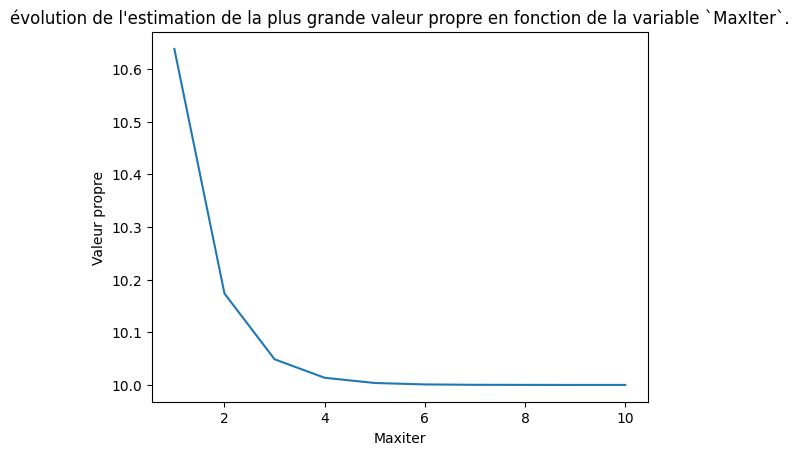

In [67]:
# Afficher les résultats

x0 = np.random.rand(len(A))
x0 = x0 / np.linalg.norm(x0)
vary_Maxiter_and_plot(A, x0)

*Commentaires et analyses des résultats:* 
On remarque que ça tend très vite vers la valeur propre réel.



**Question 4: Application de la fonction déflation sur un exemple.**


In [75]:
Maxiter =  100
lambda_Glob, u_Glob = Defl(A,x0,Maxiter)## afficher la dernière approximation de la valeur propre max de A ( le dernier élement d'un vecteur peut être obtenu avec "[-1]" )

for idx, val in enumerate(lambda_Glob):
    print("Valeur propre numéro " +  str(idx+1) + " : " + str(val))

Valeur propre numéro 1 : 9.999999999999977
Valeur propre numéro 2 : 3.999999999996868
Valeur propre numéro 3 : 3.00000000000316


**Question 5: Représenter l'évolution des deux autres valeurs propres obtenues grâce à la méthode de la déflation en fonction de la variable "MaxIter".(cf. Question 3)**

In [76]:
def plot_deflation(A, x0):
    ListeMaxIter = []
    ListeLambdasFin = []
    ListeLambdasFin2 = []
    for i in range(1,11) :
        ListeMaxIter+=[i]

    for Maxiter in ListeMaxIter:
        lambda_Glob, _ = Defl(A, x0, Maxiter)
        # On suppose que lambda_Glob est trié du plus grand au plus petit
        if len(lambda_Glob) >= 2:
            ListeLambdasFin2.append(lambda_Glob[1])
        if len(lambda_Glob) >= 3:
            ListeLambdasFin2.append(lambda_Glob[2])

    # Visualisation des résultats:
    plt.plot(ListeMaxIter, ListeLambdasFin, label='valeur propre N°2')
    plt.plot(ListeMaxIter, ListeLambdasFin2, label='valeur propre N°3')
    plt.xlabel("Maxiter")
    plt.ylabel("Valeur propre")
    plt.title("évolution de l'estimation de la plus grande valeur propre en fonction de la variable `MaxIter`.")  
    plt.show()

**Question 6: Comparer les résultats obtenus avec ceux de la première question ( avec "np.linalg.eig" ) et la convergence des valeurs propres au cours des itérations**

In [79]:
ValeurPropres = np.sort(np.abs(np.linalg.eigvals(A)))[::-1]

lambda_Glob_tri = np.sort(np.abs(lambda_Glob))[::-1]

print("Valeurs propres np.linalg.eig :", ValeurPropres)
print("Valeurs propres déflation :", lambda_Glob_tri)

Valeurs propres np.linalg.eig : [10.  4.  3.]
Valeurs propres déflation : [10.  4.  3.]


**Question 7 : Modifiez la fonction `PuissIter` pour que le critère d'arrêt de l'algorithme ne soit pas le nombre d'itérations `MaxIter`, mais plutôt la différence (notée `Tol`) entre les normes de $x_{k+1}$ et $x_k$.**

**Instructions** :
- Modifiez la fonction `PuissIter` pour qu'elle utilise la différence entre les normes de $x_{k+1}$ et $x_k$ comme critère d'arrêt.
- Utilisez une boucle `while` pour implémenter cette condition d'arrêt.

**Aide Python** :
- Consultez la documentation de la structure de contrôle `while`.


In [80]:
def PuissIter_Tol(A, x0, Tol):

    u = x0.copy()
    ListeLambdasIter = []
    ListeUIter = []
    diff = 0

    while diff > Tol:
        xk = np.dot(A, x)
        u = xk / np.linalg.norm(xk)
        lambdak = np.dot(u.T, np.dot(A, u))
        ListeLambdasIter.append(lambdak)
        ListeUIter.append(u)
        diff = np.abs(np.linalg.norm(u) - np.linalg.norm(x0))
        x0 = u.copy()

    return ListeLambdasIter, ListeUIter


**Commentaires sur ce critère d'arrêt? Sa sensibilité? Son utilité?**

Le critère d’arrêt permet de contrôler la précision de l’approximation puisque l’algorithme s’arrêtera lorsque deux vecteurs consécutifs présentent une différence négligeable. Ce critère est sensible à la tolérance Tol, si celle-ci est trop grande, l’algorithme peut s’arrêter trop tôt, si elle est trop petite, le nombre d’itérations sera élevé. 

**Question 8 : Modifiez la fonction `PuissIter` pour que les deux critères d'arrêt précédents soient pris en compte simultanément.**

**Instructions** :
- Modifiez la fonction `PuissIter` afin qu'elle s'arrête si l'un des deux critères suivants est atteint :
  - Le nombre d'itérations `MaxIter`.
  - La différence (notée `Tol`) entre les normes de $x_{k+1}$ et $x_k$.

**Aide Python** :
- Utilisez l'opérateur logique `and` pour que les deux conditions soient évaluées ensemble.



In [81]:
def PuissIter_Tol_MaxIter(A, x0, Tol, Maxiter):

    u = x0.copy()
    ListeLambdasIter = []
    ListeUIter = []
    diff = 0
    i = 0

    while diff > Tol and i<Maxiter:
        xk = np.dot(A, x)
        u = xk / np.linalg.norm(xk)
        lambdak = np.dot(u.T, np.dot(A, u))
        ListeLambdasIter.append(lambdak)
        ListeUIter.append(u)
        diff = np.abs(np.linalg.norm(u) - np.linalg.norm(x0))
        x0 = u.copy()
        i+=1

    return ListeLambdasIter, ListeUIter

**Commentaires sur cette combinaison ?  Son utilité?**

La combinaison des deux critères d’arrêt amène à garantir que l’algorithme s’arrête soit si ça converge (différence < ‘Tol’), soit à l’itération numéro max, évitant ainsi les possibles boucles infinies, et proposant un bon équilibre entre précision et temps de calcul. 

## **5- Conclusion**

**Conclure le TP et donner un exemple d'application de la méthode de la Puissance itérée, comment elle est utile à cette application?**

Ce TP a présenté la méthode de la puissance itérée pour estimer la plus grande valeur propre d'une matrice, et la méthode de déflation pour calculer les valeurs propres restantes. Ces méthodes sont simples à implémenter, efficaces pour les grandes matrices. Bien que la convergence dépende de la dominance des valeurs propres, elles offrent un bon compromis entre précision et coût de calcul.


**FIN**